Fish Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\TR67\Downloads\Telegram Desktop\Fish.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.isnull().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

In [5]:
data["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [6]:
x = data.iloc[:,[0,2,3,4,5,6]].values

In [7]:
y = data.iloc[:,1].values

In [8]:
x

array([['Bream', 23.2, 25.4, 30.0, 11.52, 4.02],
       ['Bream', 24.0, 26.3, 31.2, 12.48, 4.3056],
       ['Bream', 23.9, 26.5, 31.1, 12.3778, 4.6961],
       ['Bream', 26.3, 29.0, 33.5, 12.73, 4.4555],
       ['Bream', 26.5, 29.0, 34.0, 12.444, 5.1339999999999995],
       ['Bream', 26.8, 29.7, 34.7, 13.6024, 4.9274],
       ['Bream', 26.8, 29.7, 34.5, 14.1795, 5.2785],
       ['Bream', 27.6, 30.0, 35.0, 12.67, 4.69],
       ['Bream', 27.6, 30.0, 35.1, 14.0049, 4.8438],
       ['Bream', 28.5, 30.7, 36.2, 14.2266, 4.9594],
       ['Bream', 28.4, 31.0, 36.2, 14.2628, 5.1042],
       ['Bream', 28.7, 31.0, 36.2, 14.3714, 4.8146],
       ['Bream', 29.1, 31.5, 36.4, 13.7592, 4.368],
       ['Bream', 29.5, 32.0, 37.3, 13.9129, 5.0728],
       ['Bream', 29.4, 32.0, 37.2, 14.9544, 5.1708],
       ['Bream', 29.4, 32.0, 37.2, 15.437999999999999, 5.58],
       ['Bream', 30.4, 33.0, 38.3, 14.8604, 5.2854],
       ['Bream', 30.4, 33.0, 38.5, 14.937999999999999, 5.1975],
       ['Bream', 30.9, 33.5,

In [9]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [10]:
x.shape

(159, 6)

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
c = ColumnTransformer([("oh",OneHotEncoder(),[0])],remainder = "passthrough")
x =  c.fit_transform(x)

In [12]:
x.shape

(159, 12)

In [13]:
x

array([[1.0, 0.0, 0.0, ..., 30.0, 11.52, 4.02],
       [1.0, 0.0, 0.0, ..., 31.2, 12.48, 4.3056],
       [1.0, 0.0, 0.0, ..., 31.1, 12.3778, 4.6961],
       ...,
       [0.0, 0.0, 0.0, ..., 13.8, 2.2769999999999997, 1.2558],
       [0.0, 0.0, 0.0, ..., 15.2, 2.8728, 2.0672],
       [0.0, 0.0, 0.0, ..., 16.2, 2.9322, 1.8792]], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 25)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
ypred = lr.predict(x_test)

In [17]:
ypred

array([ 571.33920869,  703.19405887, -108.05567339,  204.45209395,
        163.3022271 ,  622.58875334,  187.64413688,    2.96940249,
         59.22684269,  978.99698209,  737.88846707,  131.15357991,
        847.6486061 ,  139.63723585,  471.16018068,  516.71292792,
         99.941497  ,  852.28269296,   56.63632637,  287.46149387,
        144.81213317,   60.43957602,  875.69946263,  275.00065451,
       1157.91073567,   69.74472784,  970.55218448,  897.38262869,
          3.70275856,   11.17935627,  485.5250139 ,  230.72921244])

In [18]:
y_test

array([ 510. ,  720. ,   51.5,  161. ,  120. ,  685. ,  145. ,    9.9,
         87. , 1000. ,  700. ,  110. ,  955. ,  130. ,  390. ,  540. ,
        120. ,  920. ,   85. ,  197. ,  150. ,   85. ,  850. ,  200. ,
       1250. ,    0. , 1100. ,  950. ,  100. ,   78. ,  500. ,  145. ])

In [19]:
x_test

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 40.0, 42.5, 45.5, 6.825,
        4.459],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.0, 35.0, 40.6, 16.3618,
        6.09],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 15.0, 16.2, 17.2, 4.5924,
        2.6316],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 22.0, 23.4, 26.7, 6.9153,
        3.6312],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 20.0, 22.0, 23.5, 6.11,
        3.4075],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.4, 34.0, 39.2, 15.9936,
        5.3704],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 20.7, 22.7, 24.2, 5.9532,
        3.63],
       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 11.3, 11.8, 13.1, 2.2139,
        1.1659],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 18.2, 19.8, 22.2, 5.6166,
        3.1746],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 39.8, 43.0, 45.2, 11.9328,
        7.2772],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 34.5, 37.0, 39.4, 10.835,
        6.2646],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 19.0, 21.0, 22.5

In [20]:
from sklearn.metrics import r2_score
accuracy = r2_score(ypred,y_test)

In [21]:
accuracy

0.9668343327490013

Prediction

In [22]:
a = [["Whitefish",23.6,25.9,29.923,15.986,5.346]]
b = c.transform(a)

In [23]:
b

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 23.6, 25.9, 29.923, 15.986,
        5.346]], dtype=object)

In [24]:
lr.predict(b)

array([363.53557516])

In [32]:
lr.predict(c.transform([["Roach",23.1,29,34.56,11.098,4.98]]))

array([803.56914178])

In [30]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


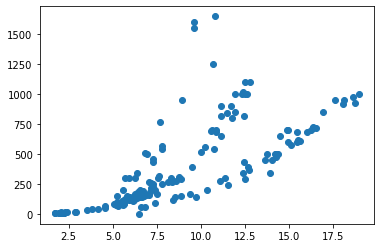

In [33]:
import matplotlib.pyplot as plt
plt.scatter(data["Height"],data["Weight"])
plt.show()

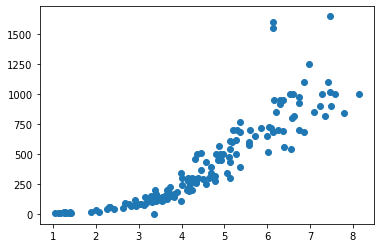

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data["Width"],data["Weight"])
plt.show()